In [55]:
import pandas as pd
import numpy as np
import locale
from locale import atof
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

In [56]:
data = pd.read_csv('final_input_output.csv')
data = data.dropna()
data = data[data['consumption_per_capita']<20]
consumption_per_capita = np.array(data['consumption_per_capita'])
data = data.drop(['consumption_per_capita','female_percent','Primary','65 or older percent'],axis=1)
#data = data[['Income']]
predictors = list(data.columns)
data = np.array(data)

In [57]:
train_predictors, test_predictors, train_output, test_output =train_test_split(data, consumption_per_capita, test_size = 0.25, random_state = 42)

In [58]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 41)
# Train the model on training data
rf.fit(train_predictors, train_output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=41, verbose=0,
                      warm_start=False)

In [59]:
predicted_value_rf = rf.predict(test_predictors)
errors_rf = abs((predicted_value_rf-test_output)/test_output)
np.mean(errors_rf)

0.09089554310177474

In [60]:
regressor = LinearRegression()  
regressor.fit(train_predictors, train_output)
predicted_value_ols = regressor.predict(test_predictors)
errors_ols = abs((predicted_value_ols-test_output)/test_output)
np.mean(errors_ols)

0.20334196545334057

In [61]:
np.max(test_output)

19.023831642442214

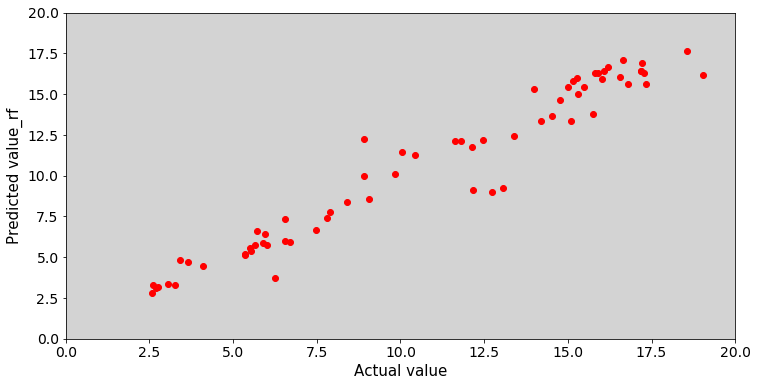

In [62]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(test_output,predicted_value_rf,color='red')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('Predicted value_rf',fontsize=15)
plt.ylim(0,20)
plt.xlim(0,20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

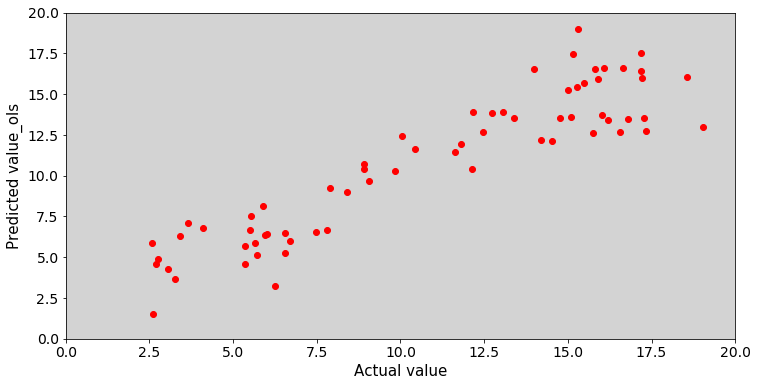

In [63]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(test_output,predicted_value_ols,color='red')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('Predicted value_ols',fontsize=15)
plt.ylim(0,20)
plt.xlim(0,20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

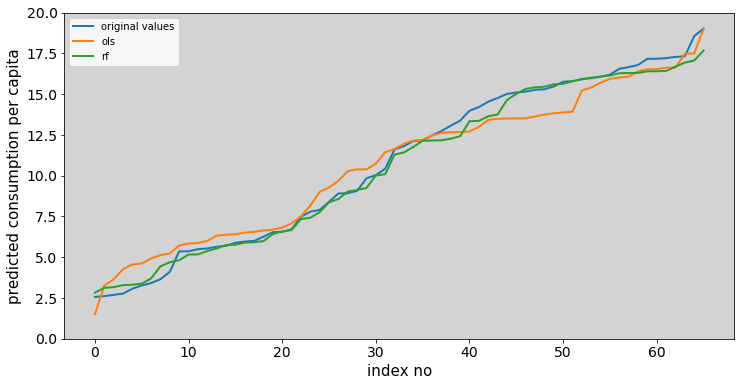

In [64]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.plot(np.sort(test_output),label='original values',linewidth=2)
plt.plot(np.sort(predicted_value_ols),label = 'ols',linewidth=2)
plt.plot(np.sort(predicted_value_rf),label='rf',linewidth=2)
plt.xlabel('index no',fontsize=15)
plt.ylabel('predicted consumption per capita',fontsize=15)
plt.ylim(0,20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')
plt.legend()

In [65]:
buurt_level_data = pd.read_csv('C:/Users/patel/Thesis/DataCleaning/BoP/buurt_data_input.csv')
buurt_level_data.head()
input_data = buurt_level_data.drop(['Name','BUURTCODE','Female','Primary','65 or older','Population'],axis=1)
#data = data[['Income']]
predictors = list(input_data.columns)
input_data = np.array(input_data)

In [66]:
consumption_clothing = rf.predict(input_data)

In [67]:
buurt_level_data['Consumptionpercapita'] = consumption_clothing
buurt_level_data.head()
clothes_consumed_buurt = buurt_level_data[['Name','BUURTCODE','Population','Consumptionpercapita']]
clothes_consumed_buurt['Total Consumption'] = clothes_consumed_buurt['Population']*clothes_consumed_buurt['Consumptionpercapita'] 
clothes_consumed_buurt.to_csv('ConsumptionBuurt.csv',index=False)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
